In [24]:
import pandas as pd 
from scipy.signal import correlate
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import sys
import os
data_path = os.path.abspath('../data')
sys.path.append(data_path)

models_path = os.path.abspath('../models')
sys.path.append(models_path)

import age_from_reviews
import correlations

from sklearn.cluster import KMeans



In [2]:
reviews_path = "/Users/marijazelic/Downloads/reviews_df.csv"
users_path = "/Users/marijazelic/Downloads/users.csv"

path_data = "/Users/marijazelic/ada-2024-project-adavengers/"

users_reviews = age_from_reviews.AgeFromReviews(users_path, reviews_path)
voting_data_merged = correlations.merge_voting_by_years(path_data)
#us_users_reviews = users_reviews.filter_beer_type()


In [3]:
year_list = [2004, 2008, 2012, 2016]
results = users_reviews.aggregate_preferences_year(year_list)

In [29]:
kmeans = KMeans(n_clusters=5, n_init="auto").fit(voting_data_merged)
states = voting_data_merged.index
cluster_labels = kmeans.labels_
state_clusters = dict(zip(states, cluster_labels))
print(state_clusters)

{'New York': 2, 'California': 2, 'New Hampshire': 1, 'Wisconsin': 1, 'Nevada': 1, 'Pennsylvania': 1, 'Virginia': 1, 'Ohio': 1, 'Florida': 1, 'North Carolina': 4, 'Arizona': 0, 'Indiana': 3}


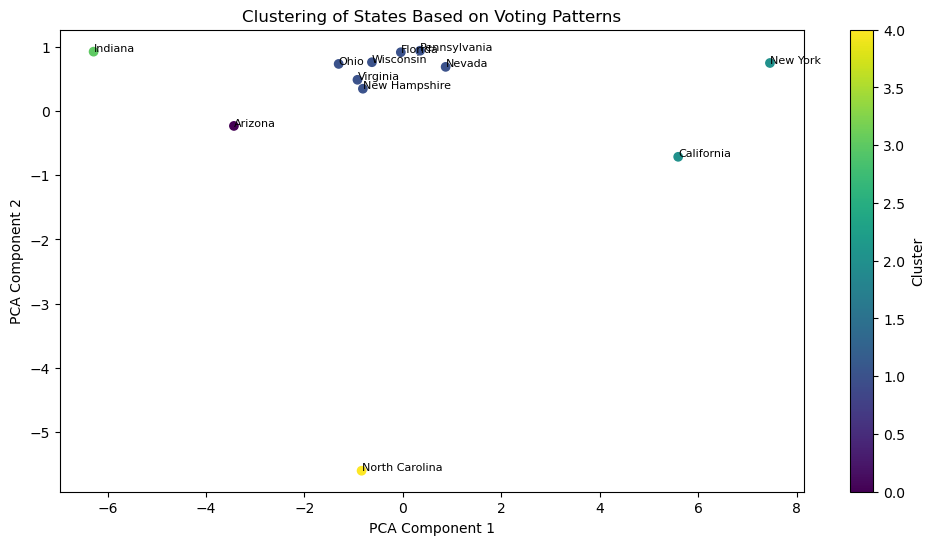

In [30]:
# We need to visualized states 
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(voting_data_merged)

plt.figure(figsize=(12,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
for i, state in enumerate(states):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], state, fontsize=8)
plt.title("Clustering of States Based on Voting Patterns")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [20]:
styles = ['IPA', 'Lager', 'Other Ale', 'Pale Ale', 'Pilsner', 'Porter', 'Red/Amber Ale']
votings = ['pop18_29_democrat', 'pop18_29_republican', 'pop30_44_democrat', 'pop30_44_republican', 'pop45_64_democrat', 'pop45_64_republican']

state = 'Arizona'
for style in styles:
    for vote in votings:
        
        # Add year
        style_years = [f"{style}_{year}" for year in year_list]
        vote_years = [f"{vote}_{year}" for year in year_list]
        
        # Create respective data for cross-correlation
        beer_pref = results.loc[state][style_years]
        voting_pref = voting_data_merged.loc[state][vote_years]
        
        correlation = correlate(beer_pref, voting_pref, mode='full')
        n = len(beer_pref)  # Length of the original series

        normalized_cross_corr = correlation / n
        
        # Printing
        print(f"Beer style: {style}")
        print(f"Vote pattern: {vote}")
        print(f"Correlation: {normalized_cross_corr}")

Beer style: IPA
Vote pattern: pop18_29_democrat
Correlation: [ 0.09773368 -0.01689804 -0.47847532  0.0666415   0.74466648 -0.20020642
 -0.20000349]
Beer style: IPA
Vote pattern: pop18_29_republican
Correlation: [-0.09773368  0.01689804  0.47847532 -0.0666415  -0.74466648  0.20020642
  0.20000349]
Beer style: IPA
Vote pattern: pop30_44_democrat
Correlation: [ 0.01599821 -0.69990931  1.02771978 -0.29643478  0.30372159 -0.13500315
 -0.17880762]
Beer style: IPA
Vote pattern: pop30_44_republican
Correlation: [-0.01599821  0.69990931 -1.02771978  0.29643478 -0.30372159  0.13500315
  0.17880762]
Beer style: IPA
Vote pattern: pop45_64_democrat
Correlation: [-0.14918633 -0.19331616  0.50975174  0.00866835  0.10755854 -0.14930958
 -0.10085448]
Beer style: IPA
Vote pattern: pop45_64_republican
Correlation: [ 0.14918633  0.19331616 -0.50975174 -0.00866835 -0.10755854  0.14930958
  0.10085448]
Beer style: Lager
Vote pattern: pop18_29_democrat
Correlation: [-0.17078715 -0.23548785  0.48384976  0.700

In [15]:
IPA_2004_A = results.loc['Arizona'][['IPA_2004', 'IPA_2008', 'IPA_2012', 'IPA_2016']]
voting_pref_A = voting_data_merged.loc['Arizona'][['pop18_29_republican_2004', 'pop18_29_republican_2008', 'pop18_29_republican_2012', 'pop18_29_republican_2016']]


In [16]:
IPA_2004_A

IPA_2004    1.335815
IPA_2008   -2.280013
IPA_2012    0.270455
IPA_2016    0.630764
Name: Arizona, dtype: float64

In [17]:
voting_pref_A

pop18_29_republican_2004    1.268326
pop18_29_republican_2008    0.725788
pop18_29_republican_2012   -0.448916
pop18_29_republican_2016   -0.292656
Name: Arizona, dtype: float64

In [18]:
correlation = correlate(IPA_2004_A, voting_pref_A, mode='full')
n = len(IPA_2004_A)  # Length of the original series
std_x = IPA_2004_A.std()
std_y = voting_pref_A.std()
normalized_cross_corr = correlation / (n * std_x * std_y)

In [19]:
normalized_cross_corr

array([-0.07537023,  0.01303142,  0.36899045, -0.05139257, -0.57427167,
        0.15439512,  0.15423863])

In [35]:
gc_res = grangercausalitytests(merged_df, 0)

ValueError: maxlag must be a positive integer